In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click /off the raw code."></form>''')

In [ ]:
from IPython import display


## <span style="color:orange;font-size:1.4em;"><b>MODEL BUILDING</b> </span> 


#### <span style="color:Red;font-size:1.4em;"><b>LOGISTIC REGRESSION</b></span> 

In [88]:
df["Group"].value_counts()

0    190
1    183
Name: Group, dtype: int64

<b>The dataset is balanced</b>

In [89]:
X=df.drop(["Group"],axis=1)
y=df["Group"]

In [90]:
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.128372
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Group   No. Observations:                  261
Model:                          Logit   Df Residuals:                      251
Method:                           MLE   Df Model:                            9
Date:                Sun, 04 Apr 2021   Pseudo R-squ.:                  0.8147
Time:                        12:18:03   Log-Likelihood:                -33.505
converged:                       True   LL-Null:                       -180.86
Covariance Type:            nonrobust   LLR p-value:                 3.444e-58
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.2042     64.348      2.070      0.038       7.085     259.323
M/F           -2.4664      1.030     -2.394      0.017      -4.486      -0.447
Age           -0.0491      0.067     -0.733      0.463      -0.180       0.082
EDUC          -0.1400      0.200     -0.700      0.484      -0.532       0.252
SES           -1.1414      0.497     -2.297      0.022      -2.116      -0.167
eTIV          -0.0381      0.020     -1.894      0.058      -0.078       0.001
nWBV         -23.0986     15.477     -1.492      0.136     -53.432       7.235
ASF          -32.0922     23.048     -1.392      0.164     -77.265      13.081
MMSE          -2.1685      9.821     -0.221      0.825     -21.418      17.081
CDR           -9.9180      2.307     -4.299      0.000     -14.440      -5.396
==============================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [91]:
y_pred=logreg.predict(X_test)

In [92]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [93]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))


### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [94]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        62
           1       0.98      0.86      0.91        50

    accuracy                           0.93       112
   macro avg       0.94      0.92      0.93       112
weighted avg       0.93      0.93      0.93       112



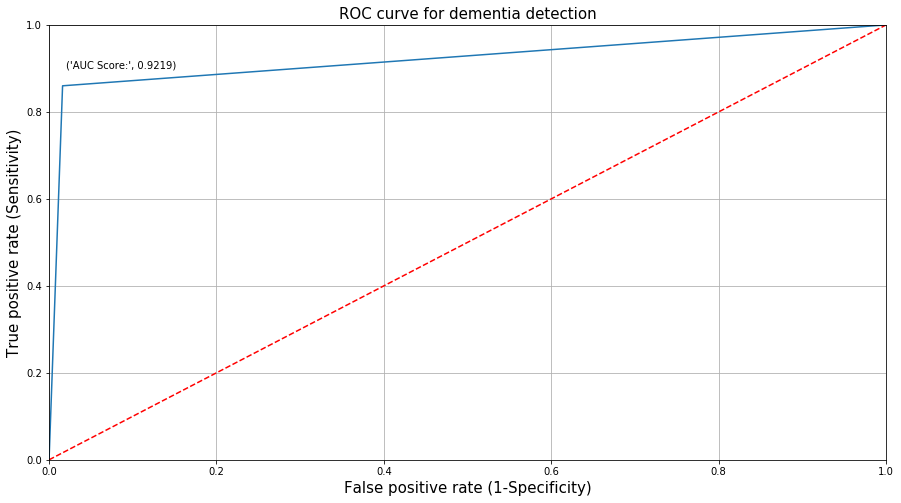

In [95]:
plot_roc(logreg)

In [96]:
update_score_card(algorithm_name = 'Logistic Regression', model = logreg)
score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for Logistic Regression is 92.8% and the model seems to be performing well for our dataset</b>

### <span style="color:Red;font-size:1.4em;"><b>Improving the model by considering only significant variables </b></span> 

In [97]:
x=logreg.pvalues
x

const   0.038446
M/F     0.016670
Age     0.463264
EDUC    0.483846
SES     0.021633
eTIV    0.058188
nWBV    0.135576
ASF     0.163799
MMSE    0.825249
CDR     0.000017
dtype: float64

In [98]:
sig_var=x[logreg.pvalues<0.05]
sig_var

const   0.038446
M/F     0.016670
SES     0.021633
CDR     0.000017
dtype: float64

In [99]:
imp_var=df[["M/F","SES","eTIV","ASF","CDR"]]


In [100]:
X=imp_var
y=df["Group"]
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.146935
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Group   No. Observations:                  261
Model:                          Logit   Df Residuals:                      255
Method:                           MLE   Df Model:                            5
Date:                Sun, 04 Apr 2021   Pseudo R-squ.:                  0.7876
Time:                        12:18:04   Log-Likelihood:                -38.350
converged:                       True   LL-Null:                       -180.59
Covariance Type:            nonrobust   LLR p-value:                 2.175e-59
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.1735     53.686      2.406      0.016      23.951     234.396
M/F           -2.3887      0.969     -2.465      0.014      -4.288      -0.489
SES           -1.2750      0.404     -3.154      0.002      -2.067      -0.483
eTIV          -0.0457      0.018     -2.480      0.013      -0.082      -0.010
ASF          -41.2630     20.649     -1.998      0.046     -81.735      -0.791
CDR          -10.6623      2.227     -4.787      0.000     -15.028      -6.297
==============================================================================
"""

In [101]:
y_pred=logreg.predict(X_test)

In [102]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [103]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))



### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [104]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.98      0.91      0.94        46

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.95       112
weighted avg       0.96      0.96      0.96       112



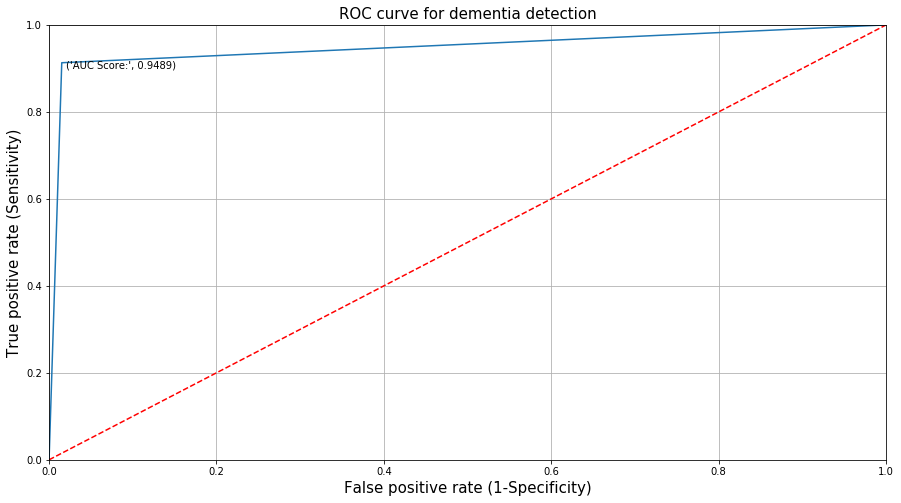

In [105]:
plot_roc(logreg)

In [106]:
update_score_card(algorithm_name = 'Logistic Regression -Significant Variables', model = logreg)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for Logistic Regression - Significant Variables has improved the model performance which is indicative from the accuracy value of 93.7%</b>

### <span style="color:Red;font-size:1.4em;"><b>Feature selection using RFE</b></span> 

In [107]:
from sklearn.feature_selection import RFE

In [108]:
X=df.drop(["Group"],axis=1)
y=df["Group"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

linreg_rfe = LogisticRegression()

rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 6)

rfe_model = rfe_model.fit(X_train, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['M/F', 'EDUC', 'SES', 'ASF', 'MMSE', 'CDR'], dtype='object')


In [109]:
X2=df[['EDUC', 'SES', 'nWBV', 'ASF', 'MMSE', 'CDR']]
y2=df["Group"]
X2=sm.add_constant(X2)


In [110]:
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.3)

In [111]:

logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.170716
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Group   No. Observations:                  261
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                            6
Date:                Sun, 04 Apr 2021   Pseudo R-squ.:                  0.7531
Time:                        12:18:05   Log-Likelihood:                -44.557
converged:                       True   LL-Null:                       -180.48
Covariance Type:            nonrobust   LLR p-value:                 8.735e-56
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3051      9.952      1.638      0.101      -3.201      35.811
EDUC          -0.3457      0.154     -2.252      0.024      -0.647      -0.045
SES           -1.3365      0.400     -3.342      0.001      -2.120      -0.553
nWBV         -10.4000      8.337     -1.247      0.212     -26.741       5.941
ASF            6.8745      2.412      2.851      0.004       2.148      11.601
MMSE          -2.0266      3.555     -0.570      0.569      -8.994       4.941
CDR           -7.3660      1.112     -6.624      0.000      -9.545      -5.187
==============================================================================
"""

In [112]:
y_pred=logreg.predict(X_test)

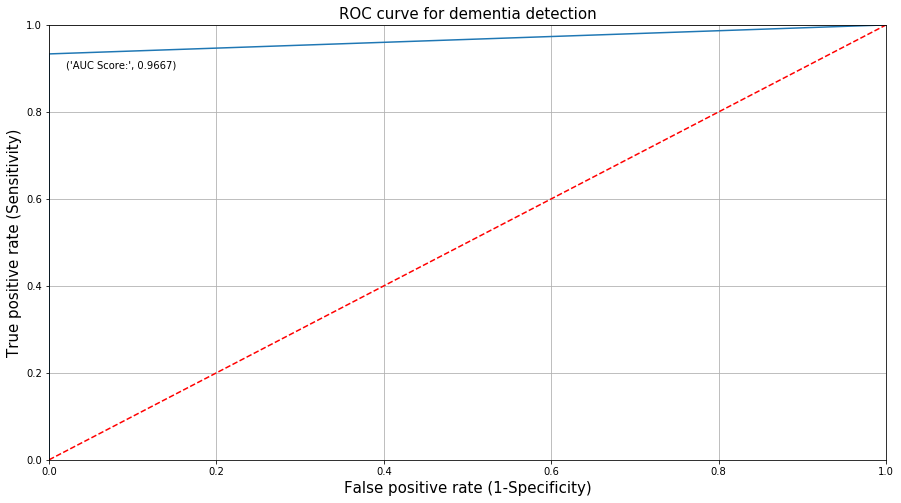

In [116]:
plot_roc(logreg)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy is 96%.This model with feature selection performs better than the previous models</b>

In [117]:
correct=(TN+TP)/(TN+TP+FP+FN)
print("Correctly classified :",correct*100)

Correctly classified : 96.42857142857143


In [118]:
in_correct=(FN+FP)/(TN+TP+FP+FN)
print("In_Correctly classified :",in_correct*100)

In_Correctly classified : 3.571428571428571


In [119]:
update_score_card(algorithm_name = 'Logistic Regression -RFE', model = logreg)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for Logistic Regression - RFE is reduced to 51%.</b>

### <span style="color:Red;font-size:1.4em;"><b>Naive Bayes Classifier</b></span> 



### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [123]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        52
           1       1.00      0.93      0.97        60

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



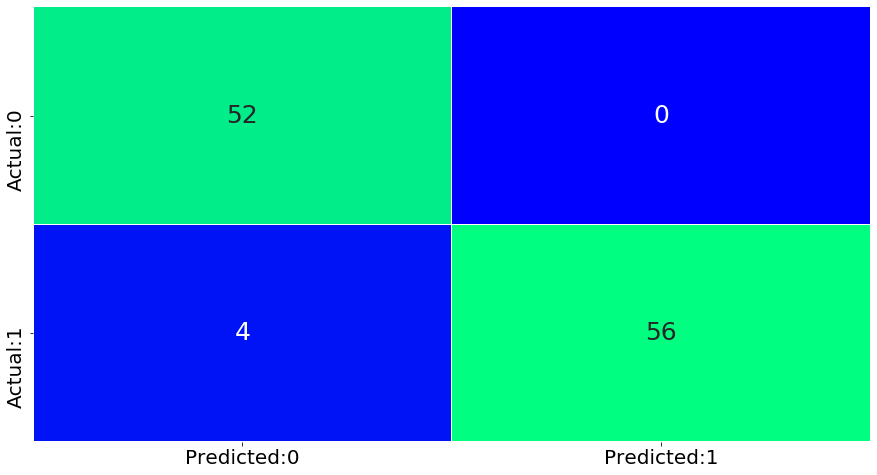

In [124]:
plot_confusion_matrix(gnb_model)

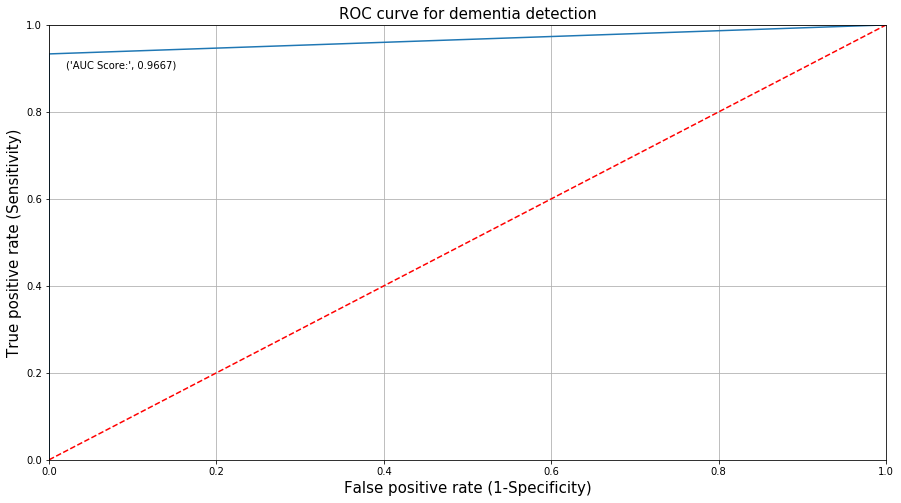

In [125]:

plot_roc(gnb_model)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.93.</b>

In [126]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [127]:
update_score_card(algorithm_name = 'Naive Bayes', model = gnb_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for Naive Bayes is 93% but the precision is 100%.</b>

### <span style="color:Red;font-size:1.4em;"><b>KNearest Neighbour Classifier</b></span> 

In [128]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

In [129]:
y_pred=knn_model.predict(X_test)

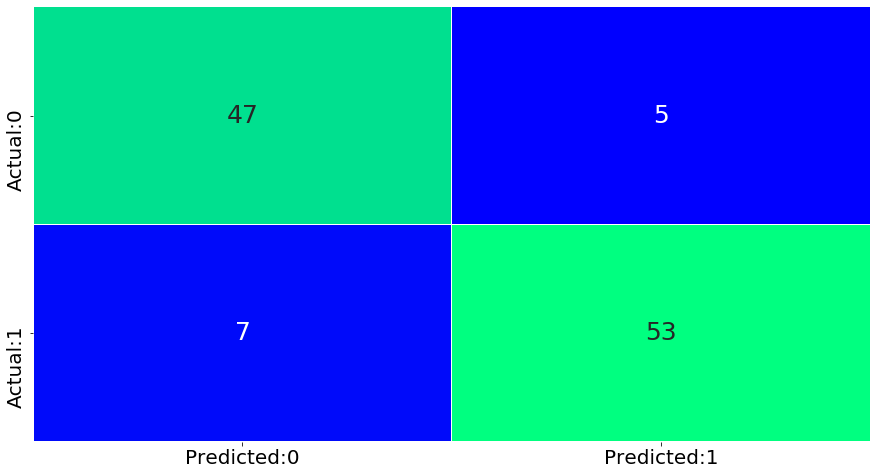

In [130]:
plot_confusion_matrix(knn_model)

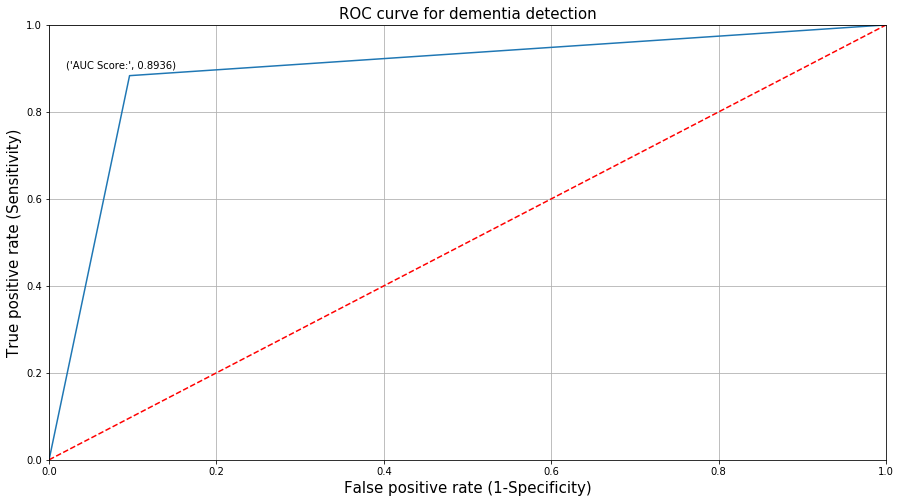

In [131]:
plot_roc(knn_model)

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The AUC Score is 0.93.</b>

In [132]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [133]:
update_score_card(algorithm_name = 'KNN ', model = knn_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for KNN is 93% but the precision is 94%.</b>

### <span style="color:Red;font-size:1.4em;"><b>Hyper-parameter tuning using KNN classifier</b></span> 

In [134]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['euclidean']}
knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 1} 



In [135]:
y_pred=knn_grid.predict(X_test)

In [136]:
print("The accuracy is :",accuracy_score(y_test,y_pred))

The accuracy is : 0.9464285714285714


In [137]:
update_score_card(algorithm_name = 'knn-hyperparameter tuning', model = knn_grid)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for KNN - Hyperparameter tuning is 93% but the precision is 94%.</b>

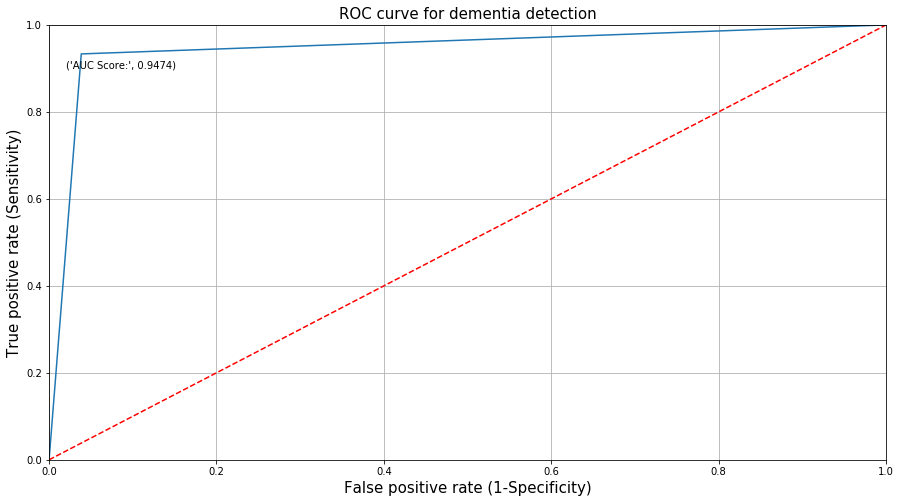

In [138]:
plot_roc(knn_grid)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.98.</b>


### <span style="color:Red;font-size:1.4em;"><b> DecisionTree classifier</b></span> 

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image  

In [140]:
X1=df.drop(["Group"],axis=1)
y1=df["Group"]

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=10)


In [142]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini',splitter='best',max_depth=3, random_state = 10)
dtree = decision_tree_classification.fit(X_train, y_train)

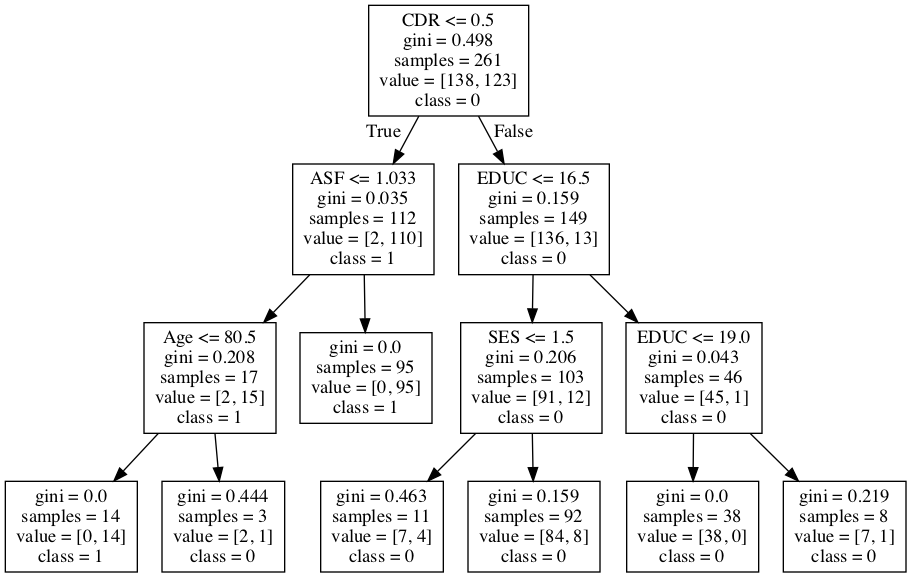

In [143]:
labels = X_train.columns

dot_data = tree.export_graphviz(dtree, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

In [144]:
y_pred=dtree.predict(X_test)


### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [146]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



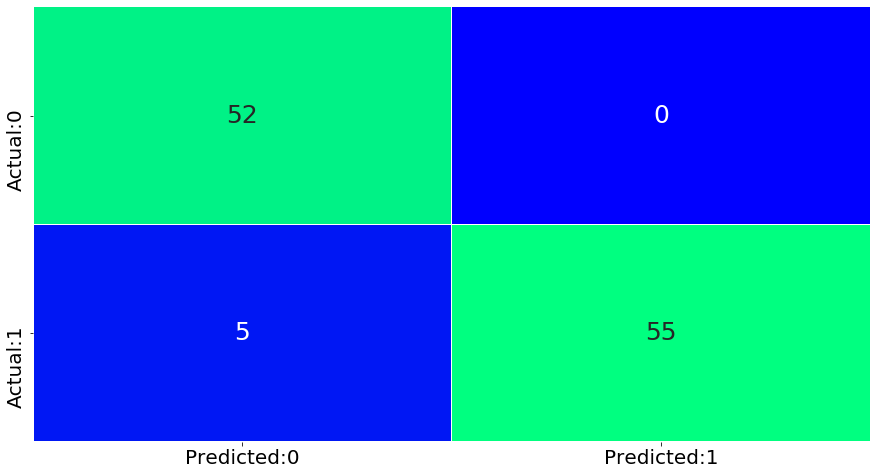

In [147]:
plot_confusion_matrix(dtree)

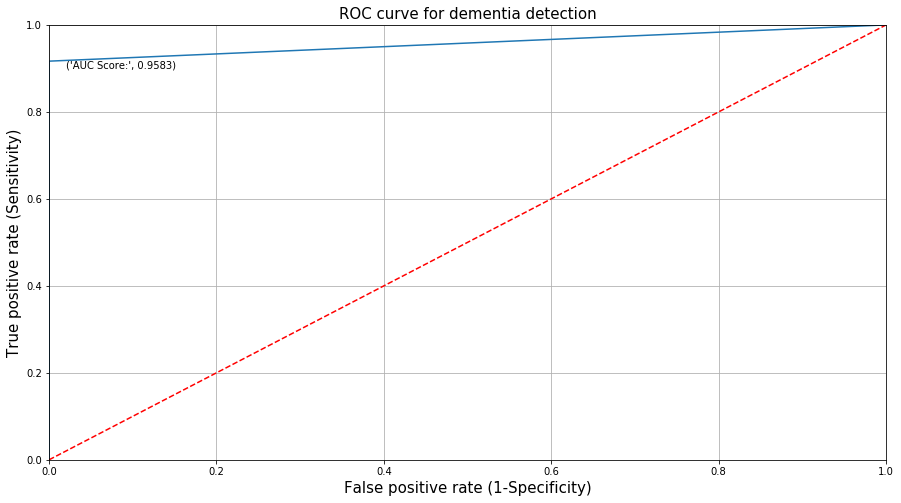

In [148]:
plot_roc(dtree)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.95.</b>

In [149]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [150]:
update_score_card(algorithm_name = 'Decision Tree ', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for Decision Tree is 95% and the precision is 100%.</b>

### <span style="color:Red;font-size:1.4em;"><b> Hyperparameter tuning decision tree</b></span> 

In [151]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                  
                     'min_samples_split': range(2,10)
                    
                     }]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2} 



In [152]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),   
                                 min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

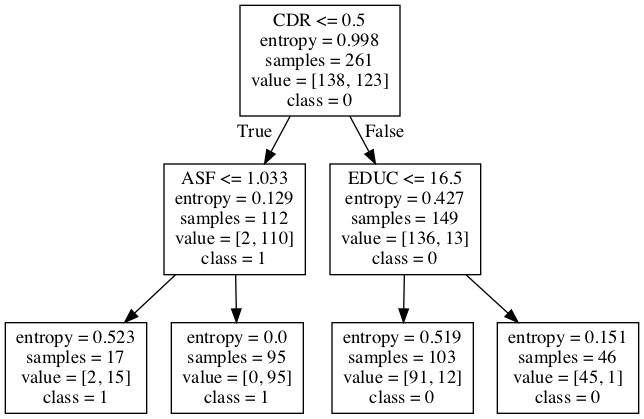

In [153]:
labels = X_train.columns

dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["0","1"])  

graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

In [154]:
y_pred=dt_model.predict(X_test)

In [155]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

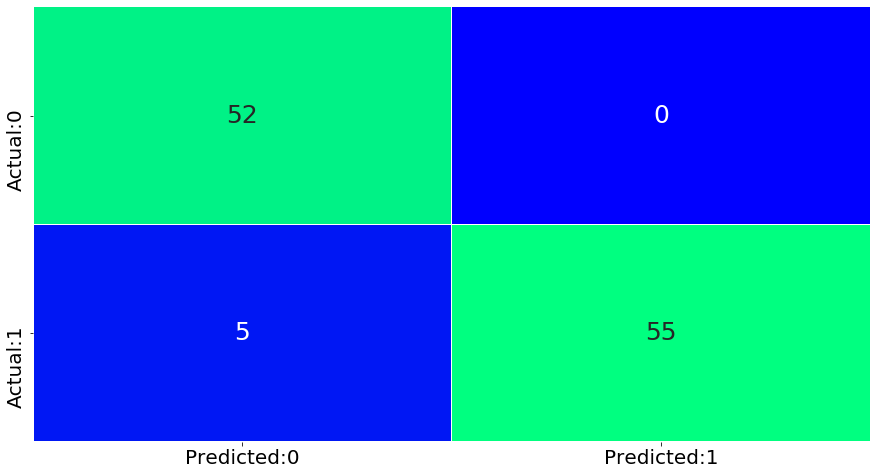

In [156]:
plot_confusion_matrix(dt_model)

In [157]:
update_score_card(algorithm_name = 'Decision Tree-hyperparameter tuning ', model = dt_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for Decision Tree - Hyperparameter tuning is 95% and the precision is 100%.</b>

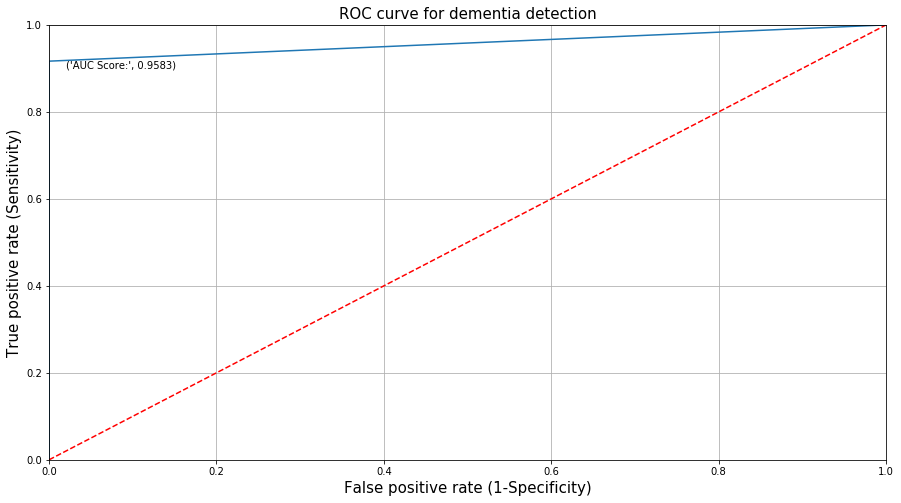

In [158]:
plot_roc(dt_model)

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The AUC Score is 0.95.</b>

In [159]:
score=cross_val_score(dt_model,X_train,y_train,cv=10,scoring="accuracy")
score.mean()

0.9425925925925925


### <span style="color:Red;font-size:1.4em;"><b> Random Forest classifier</b></span> 

### <span style="color:blue;font-size:1.4em;"><b> Classification Report-Train_data</b> </span> 

In [162]:
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       138
           1       1.00      0.98      0.99       123

    accuracy                           0.99       261
   macro avg       0.99      0.99      0.99       261
weighted avg       0.99      0.99      0.99       261



### <span style="color:blue;font-size:1.4em;"><b> Classification Report-Test_data</b> </span> 

In [163]:
test_report = get_test_report(rf_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        52
           1       1.00      0.93      0.97        60

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



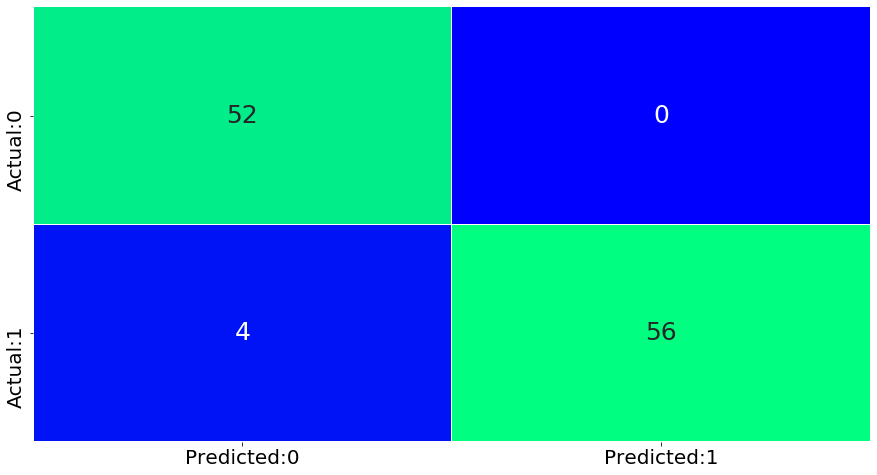

In [164]:
plot_confusion_matrix(rf_model)

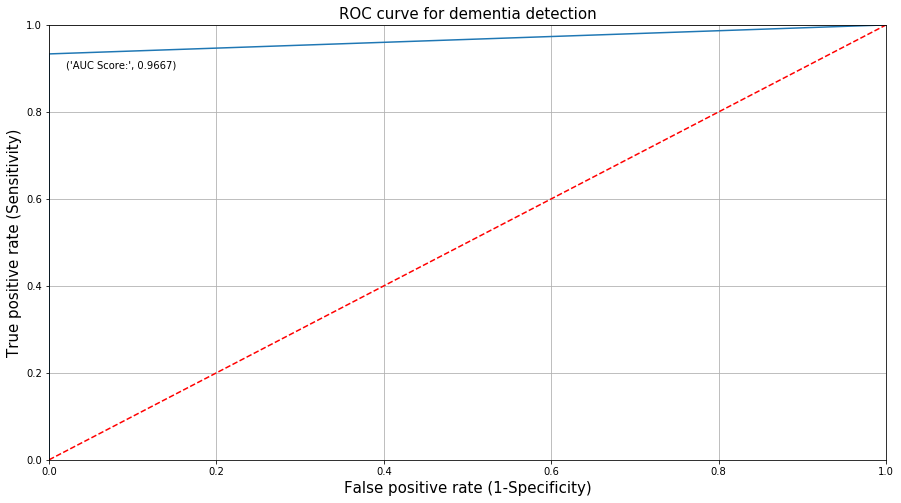

In [165]:
plot_roc(rf_model)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.96.</b>

In [166]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [167]:
update_score_card(algorithm_name = 'Random Forest', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for Random Forest is 96% and the precision is 100%.</b>


### <span style="color:Red;font-size:1.4em;"><b> Random forest - with hyperparameter tuning </b></span> 

In [168]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')
 

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10} 




### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [169]:
# type your code here
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.95      0.97        60

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



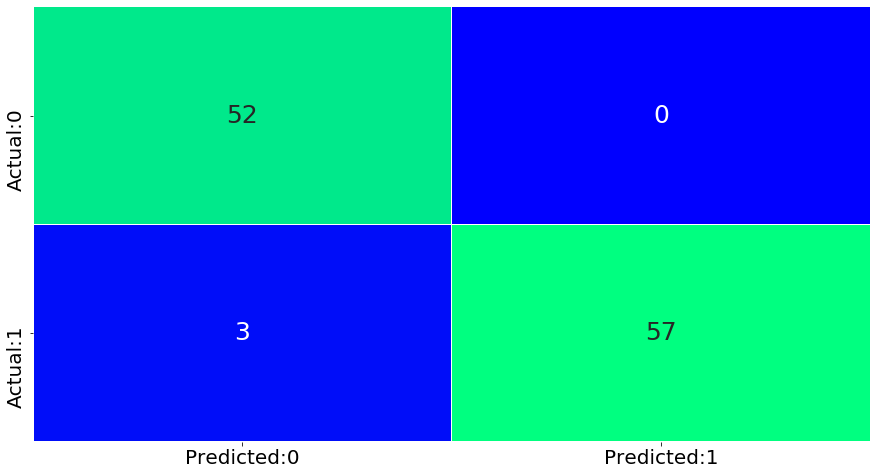

In [170]:
plot_confusion_matrix(rf_model)

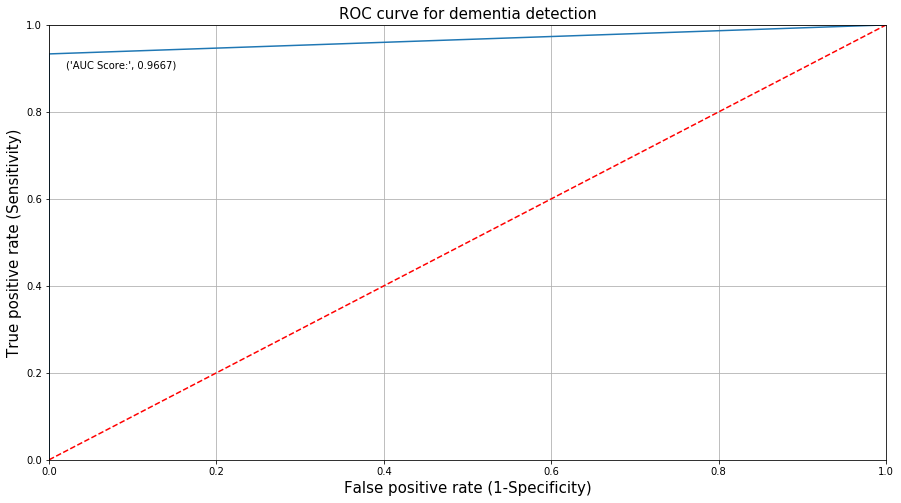

In [171]:
plot_roc(rf_model)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.96.</b>

In [172]:
update_score_card(algorithm_name = 'Random Forest-hyperparameter tuning', model = rf_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for Random Forest - hyperparameter tuning remains 96% and the precision is 100%.</b>



### <span style="color:Red;font-size:1.4em;"><b>  ADABOOST </b></span> 

In [173]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [174]:
y_pred=ada_model.predict(X_test)

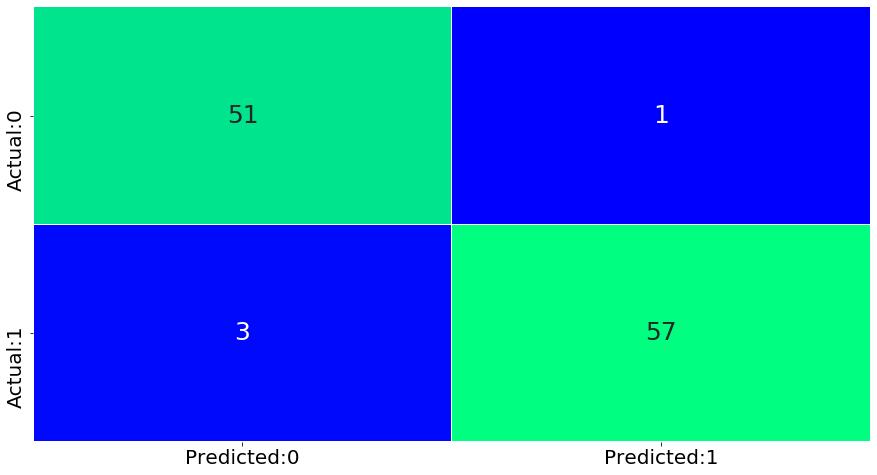

In [175]:
plot_confusion_matrix(ada_model)


### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [176]:
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.98      0.95      0.97        60

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.96      0.96      0.96       112



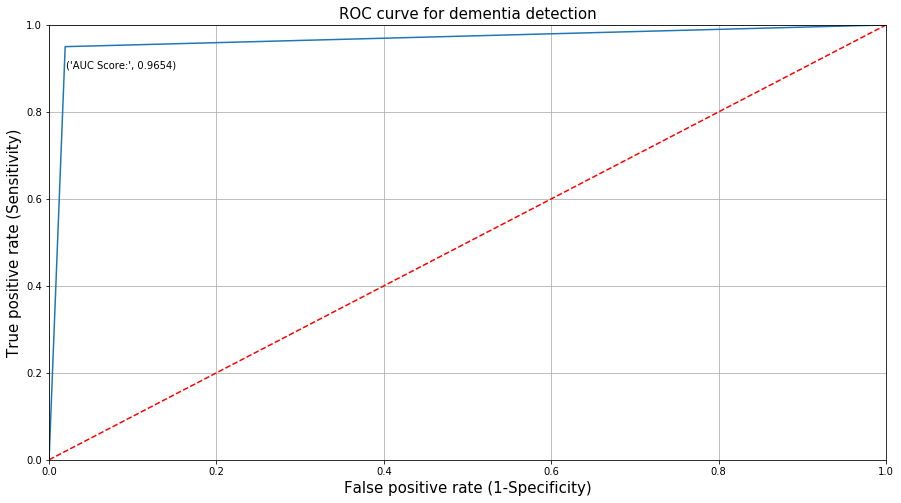

In [177]:
plot_roc(ada_model)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.88.</b>

In [178]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [179]:
update_score_card(algorithm_name = 'ADA Boost', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for ADA Boost is 88% and the precision is 90%.</b>


### <span style="color:Red;font-size:1.4em;"><b>  Gradient Boosting </b></span> 

In [180]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [181]:
y_pred=gboost_model.predict(X_test)

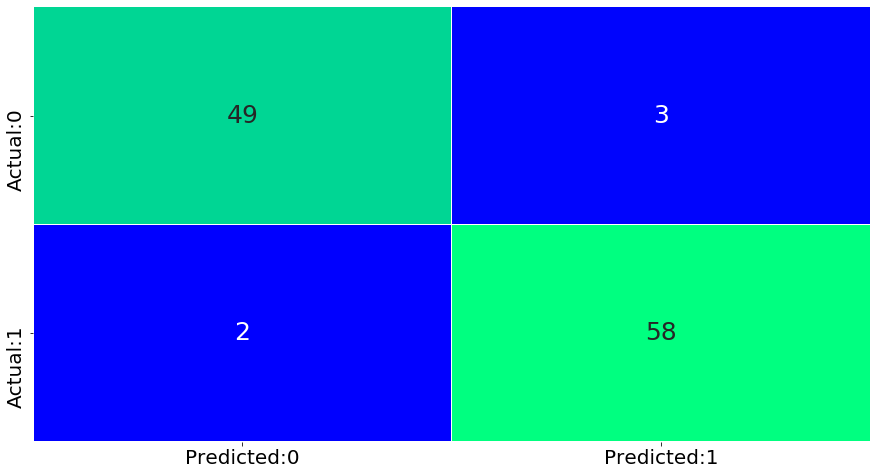

In [182]:
plot_confusion_matrix(gboost_model)


### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [183]:
test_report = get_test_report(gboost_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.95      0.97      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112



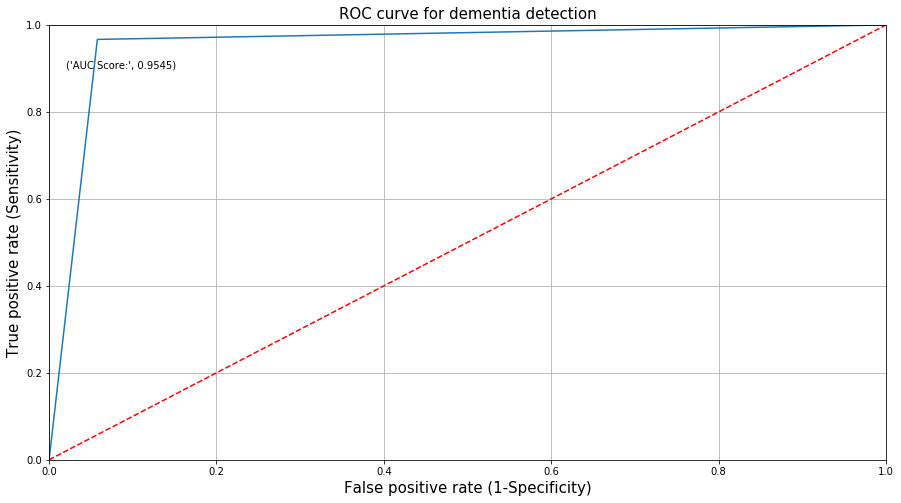

In [184]:
plot_roc(gboost_model)

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The AUC Score is 0.89.</b>

In [185]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [186]:
update_score_card(algorithm_name = 'Gradient Boosting', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for Gradient Boosting is 89% but the precision is 88%.</b>


### <span style="color:Red;font-size:1.4em;"><b>  XGBOOST </b></span> 

In [187]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model.fit(X_train, y_train)

XGBClassifier(gamma=1, max_depth=10)

In [188]:
y_pred=xgb_model.predict(X_test)

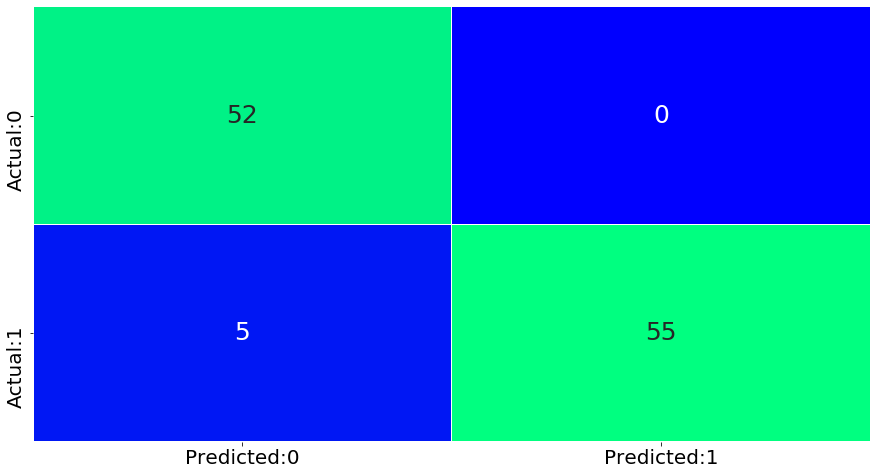

In [189]:

plot_confusion_matrix(xgb_model)


### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [190]:
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



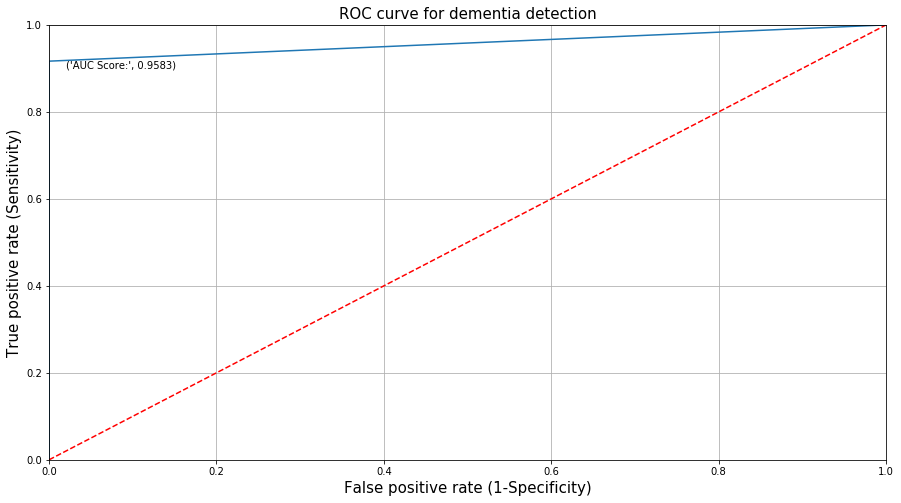

In [191]:
plot_roc(xgb_model)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.93.</b>

In [192]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [193]:
update_score_card(algorithm_name = 'XG Boost', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for XG Boost is 94% and the precision is 100%.</b>


### <span style="color:Red;font-size:1.4em;"><b>   Tuning hyperparamenters using XGBoost </b></span> 

In [194]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}


xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.6, 'max_depth': 4} 



In [195]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.98      0.95      0.97        60

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.96      0.96      0.96       112



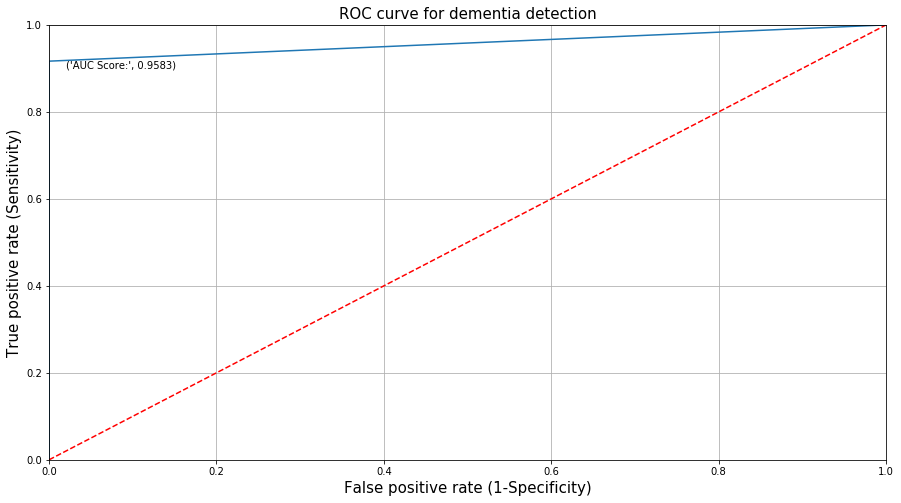

In [196]:
plot_roc(xgb_model)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.93.</b>

In [197]:
update_score_card(algorithm_name = 'XG Boost-tuning hyperparameters', model = xgb_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for XG Boost - hyperparameter tuning remains at is 94% and the precision is 100%.</b>


### <span style="color:Red;font-size:1.4em;"><b>  Important features using XGBOOST </b></span> 

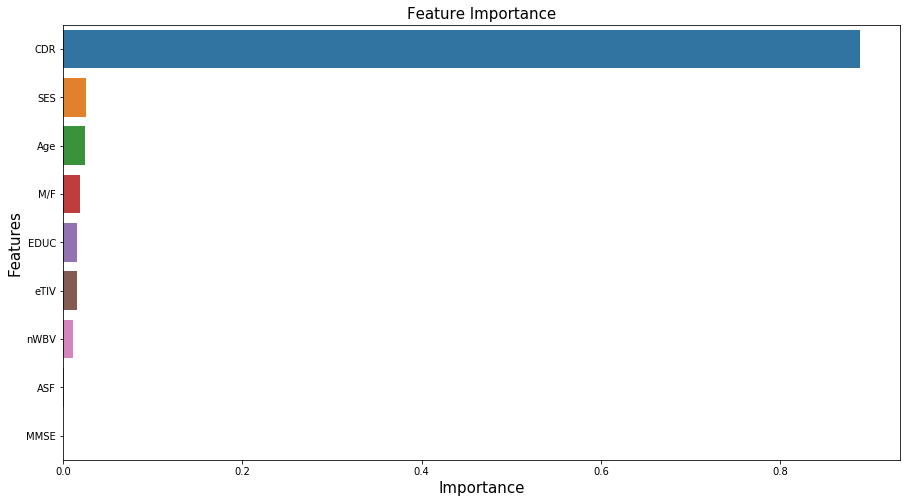

In [198]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [204]:
df.columns

Index(['M/F', 'Age', 'EDUC', 'SES', 'eTIV', 'nWBV', 'ASF', 'Group', 'MMSE',
       'CDR'],
      dtype='object')

In [205]:
X1=df[["nWBV","eTIV","EDUC","M/F","Age","SES","CDR"]]
y1=df["Group"]

In [206]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=10)

In [208]:
xgb_model1 = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model1.fit(X_train, y_train)

XGBClassifier(gamma=1, max_depth=10)

In [209]:
y_pred=xgb_model1.predict(X_test)

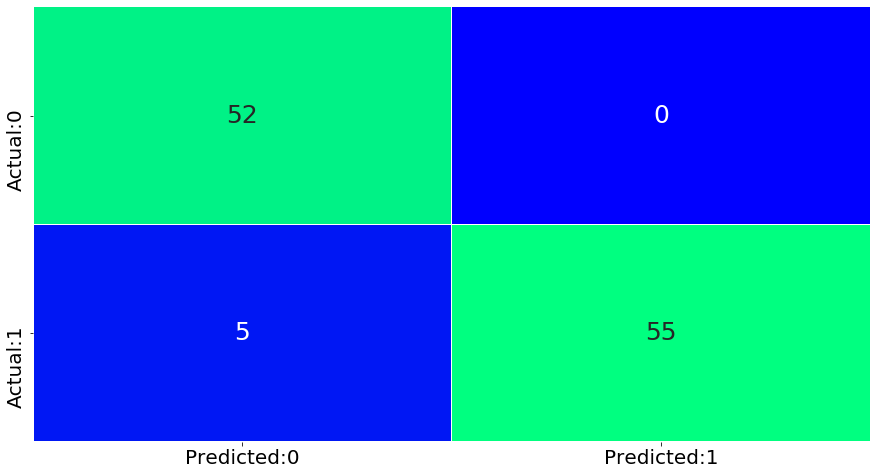

In [210]:
plot_confusion_matrix(xgb_model1)


### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [211]:
test_report = get_test_report(xgb_model1)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



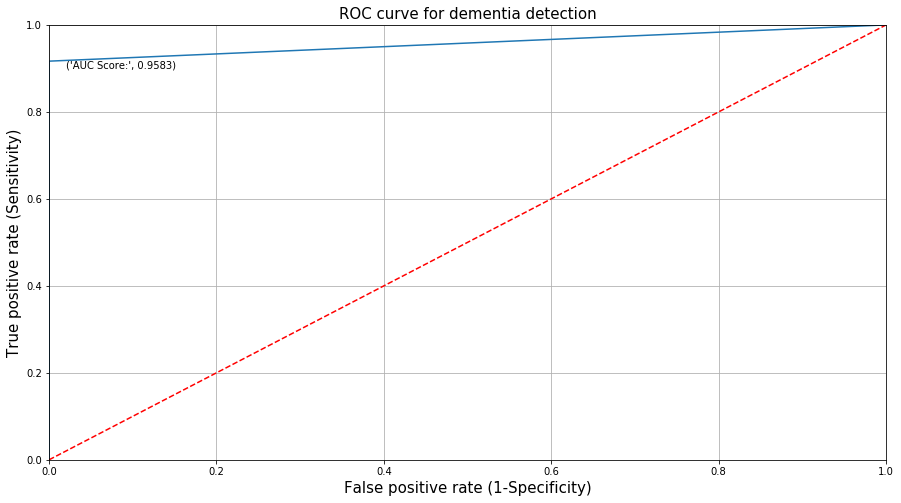

In [213]:
plot_roc(xgb_model1)

In [214]:
update_score_card(algorithm_name = 'XG Boost-imp features', model = xgb_model1)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


 
### <span style="color:Red;font-size:1.4em;"><b> STACKING CLASSIFIER </b></span> 

In [199]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

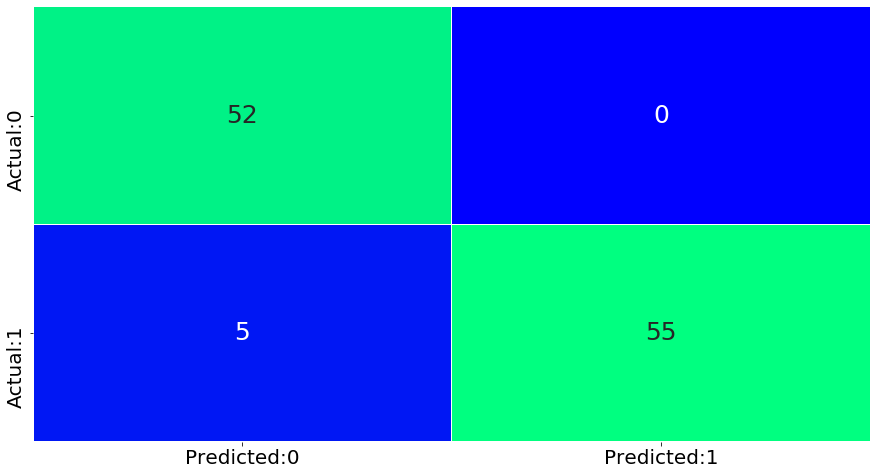

In [200]:
plot_confusion_matrix(stack_model)



### <span style="color:blue;font-size:1.4em;"><b> Classification Report-train_data</b> </span> 

In [201]:
test_report = get_train_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       138
           1       0.98      0.89      0.94       123

    accuracy                           0.94       261
   macro avg       0.95      0.94      0.94       261
weighted avg       0.95      0.94      0.94       261




### <span style="color:blue;font-size:1.4em;"><b>Classification Report-test_data</b> </span> 


In [202]:
test_report = get_test_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



In [203]:
update_score_card(algorithm_name = 'Stacking classifier', model = stack_model)
score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963




### <span style="color:Red;font-size:1.4em;"><b>Ensemble Techiniques</b> </span> 


display.Image("/Users/mons/Desktop/sem 2/ML 2 PROJECT/Screenshot 2021-04-05 at 3.03.29 PM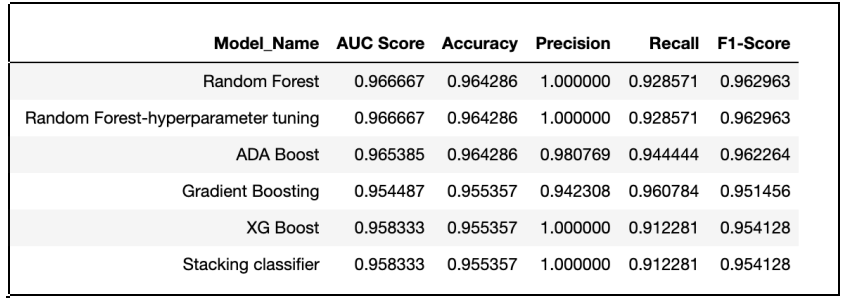")


from IPython import display
display.Image("/Users/mons/Desktop/sem 2/ML 2 PROJECT/1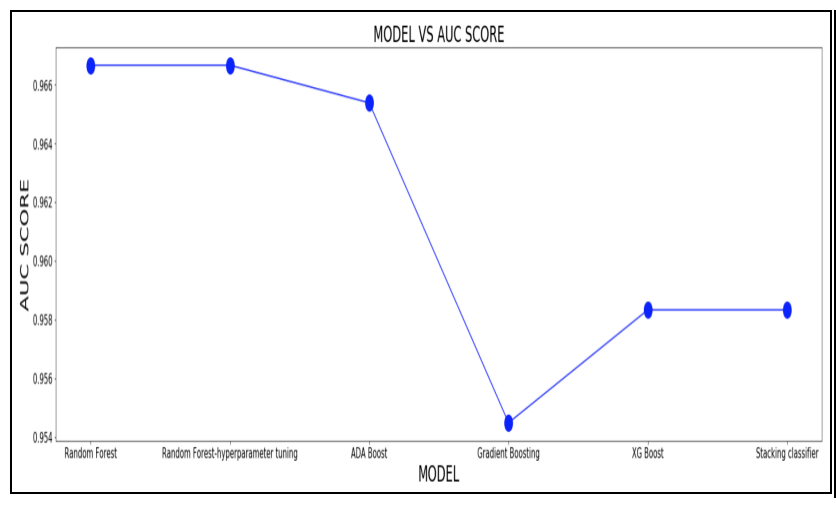")

### Based on the AUC_ROC score has our evaluation metric we see that Logistic_regression-RFE,Naive Bayes ,Random forest-hyperparameter tuning  and AdaBoost models are performing better than other models with an AUC score of 96% and thus any one of the models can be used for detection of dementia